In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import time

In [68]:
class Agent(object):
    def __init__(self,wallet,portfolio, modelo):
        self.wallet=wallet
        self.portfolio=portfolio
    
    def checkWallet(self):
        return self.wallet
    
    def action(self):
        pass
    
    def get_portfolio(self):
        return self.portfolio
    
    def predictor(self):
        pass
    
class Market(object):
    def __init__(self,initial_time,data):
        self.initial_time=initial_time
        self.data=data
        
    def historic_data(self,portfolio):
        return self.data.loc[self.initial_time:(self.initial_time+5*60),portfolio]
    
        

In [12]:
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y %H:%M:%S").timetuple()))

In [ ]:
data=pd.read_csv('data/train.csv')

In [14]:
data.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [22]:
assets_details=pd.read_csv('data/asset_details.csv')

asset_names = [
    'Bitcoin',
    'Ethereum',
    'Cardano',
    'Binance Coin',
    'Dogecoin',
    'Bitcoin Cash',
    'Litecoin',
    'Ethereum Classic',
    'Stellar',
    'TRON',
    'Monero',
    'EOS.IO',
    'IOTA',
    'Maker'
]

asset_names_dict = {row["Asset_Name"]:row["Asset_ID"] for ind, row in assets_details.iterrows()}

all_assets_df = pd.DataFrame([])
for ind, coin in enumerate(asset_names):
    coin_df = data[data["Asset_ID"]==asset_names_dict[coin]].set_index("timestamp")
    # fill missing values
    coin_df = coin_df.loc[totimestamp('31/12/2017 19:01:00'):totimestamp('01/03/2021 01:01:00')]
    close_values = coin_df["Close"].fillna(0)
    close_values.name = coin
    all_assets_df = all_assets_df.join(close_values, how="outer")

In [24]:
all_assets_df

,Bitcoin,Ethereum,Cardano,Binance Coin,Dogecoin,Bitcoin Cash,Litecoin,Ethereum Classic,Stellar,TRON,Monero,EOS.IO,IOTA,Maker
timestamp,,,,,,,,,,,,,,
1514764860,13850.176000,738.507500,NaN,8.53000,NaN,2374.590000,225.206667,25.877000,NaN,NaN,329.4600,7.657600,NaN,NaN
1514764920,13828.102000,738.260000,NaN,8.51450,NaN,2372.286667,224.856667,25.897000,NaN,NaN,329.4500,7.656700,NaN,NaN
1514764980,13801.314000,737.502500,NaN,8.48480,NaN,2372.063333,226.000000,26.469500,NaN,NaN,329.1900,7.651200,NaN,NaN
1514765040,13768.040000,737.102500,NaN,8.50090,NaN,2370.566667,224.275000,26.449500,NaN,NaN,328.1600,7.635800,NaN,NaN
1514765100,13724.914000,735.705000,NaN,8.45600,NaN,2370.173333,223.820000,26.437000,NaN,NaN,327.4300,7.610000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614578220,46206.808571,1431.671429,1.261699,221.04405,0.048379,466.507500,165.122800,10.373325,0.405549,0.045296,212.2500,3.478800,1.14050,2150.017350
1614578280,46230.160000,1433.547143,1.263810,221.75150,0.048410,466.740000,165.366429,10.354425,0.405877,0.045319,212.5950,3.479525,1.14140,2150.475050
1614578340,46234.911429,1434.721420,1.266595,221.79780,0.048418,466.392500,165.332429,10.370933,0.406252,0.045339,212.5500,3.485550,1.14120,2149.856700


In [69]:
crypto_stream=Market(totimestamp('01/01/2021 01:01:00'),all_assets_df)

In [71]:
crypto_stream.historic_data(asset_names)

,Bitcoin,Ethereum,Cardano,Binance Coin,Dogecoin,Bitcoin Cash,Litecoin,Ethereum Classic,Stellar,TRON,Monero,EOS.IO,IOTA,Maker
timestamp,,,,,,,,,,,,,,
1609480860,29235.237143,742.448571,0.183012,37.7474,0.004960,349.335000,131.488000,5.776667,0.134023,0.027040,160.677500,2.631610,0.30115,592.243350
1609480920,29228.102500,742.478571,0.183019,37.7717,0.004959,349.346667,131.521000,5.775625,0.134000,0.027043,160.756667,2.632133,0.30070,592.245700
1609480980,29257.451429,742.850000,0.182922,37.7774,0.004954,349.468000,131.690000,5.763900,0.133992,0.027041,160.780000,2.633150,0.30150,592.351900
1609481040,29256.123750,743.388571,0.182947,37.7943,0.004948,349.850000,132.091857,5.778500,0.134052,0.027041,160.830000,2.633625,0.30145,592.836667
1609481100,29260.560000,743.422692,0.182955,37.7987,0.004921,350.080000,132.141429,5.776500,0.134145,0.027046,160.767500,2.634820,0.30090,593.506567
1609481160,29262.015714,742.875714,0.182708,37.7960,0.004894,349.592500,131.885571,5.775500,0.133929,0.027055,160.330000,2.633925,0.30115,593.515000


In [72]:
crypto_stream.historic_data(asset_names).rolling(window=5).mean()

,Bitcoin,Ethereum,Cardano,Binance Coin,Dogecoin,Bitcoin Cash,Litecoin,Ethereum Classic,Stellar,TRON,Monero,EOS.IO,IOTA,Maker
timestamp,,,,,,,,,,,,,,
1609480860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1609480920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1609480980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1609481040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1609481100,29247.494964,742.917681,0.182971,37.77790,0.004948,349.615933,131.786457,5.774238,0.134043,0.027042,160.762333,2.633068,0.30114,592.636837
1609481160,29252.850679,743.003110,0.182910,37.78762,0.004935,349.667433,131.865971,5.774005,0.134024,0.027045,160.692833,2.633531,0.30114,592.891167


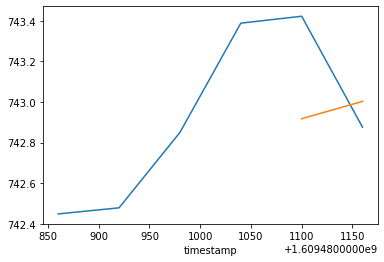

In [73]:
crypto_stream.historic_data(asset_names).Ethereum.plot()
crypto_stream.historic_data(asset_names).rolling(window=5).mean().Ethereum.plot()
plt.show()

In [74]:
crypto_stream.historic_data(asset_names).Ethereum-crypto_stream.historic_data(asset_names).rolling(window=5).mean().Ethereum

timestamp
1609480860         NaN
1609480920         NaN
1609480980         NaN
1609481040         NaN
1609481100    0.505010
1609481160   -0.127395
Name: Ethereum, dtype: float64